In [2]:
import pandas as pd
import os
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# PDB Analysis

In [3]:
pdb_list=[]
for file in os.listdir("/Users/georginikov/Documents/solenoid_folder_test/"):
    if 'chunk' in file and file.endswith('.csv'):
        df=pd.read_csv(os.path.join("/Users/georginikov/Documents/solenoid_folder_test/",file))
        pdb_list.append(df)

In [4]:
full_pdb_list=pd.concat(pdb_list)
print(sum([len(i) for i in pdb_list]))

599443


In [5]:
len(full_pdb_list['structure_id'].unique())

175084

## Get alpha, alpha-beta and beta-solenoids

In [6]:
alphas=full_pdb_list[full_pdb_list['alpha_percentage']>50]
alphabetas=full_pdb_list[full_pdb_list['alphabeta_percentage']>50]
betas=full_pdb_list[full_pdb_list['beta_percentage']>50]

## Get competitor databases

### DbStrips

In [7]:
dbstrips_bframe=pd.read_csv('/Users/georginikov/Downloads/b_solenoid_fix.csv')
dbstrips_bframe2=dbstrips_bframe.drop_duplicates('PDB')
dbstrips_bframe2[dbstrips_bframe2['Repeat type']!='PRC_EE_3LayerSandwich_16']
dbstrips_abframe=pd.read_csv('/Users/georginikov/Downloads/ab_solenoid_fix.csv', delimiter=',')
dbstrips_abframe2=dbstrips_abframe.drop_duplicates('PDB')
dbstrips_aframe=pd.read_csv('/Users/georginikov/Downloads/a_solenoid_fix.csv')
dbstrips_aframe2=dbstrips_aframe.drop_duplicates('PDB')
dbstrips_frame=pd.concat([dbstrips_bframe,dbstrips_abframe,dbstrips_aframe])
dbstrips_frame['whole_id']=[i.lower() for i in dbstrips_frame['PDB'].tolist()]+dbstrips_frame['Chain']
dbstrips_dedup=dbstrips_frame.drop_duplicates('PDB')
dbstrips_list=dbstrips_frame['PDB'].unique().tolist()
dbstrips_list=[i.lower() for i in dbstrips_list]
dbstrips_chains=dbstrips_frame['whole_id'].unique().tolist()

### RepeatsDB

In [8]:
import numpy as np

In [9]:
rdb_frame=pd.read_csv('/Users/georginikov/Downloads/RepeatsDB-table(3).tsv', sep='\t')
rdb_frame['pdb_id']=[i[0:4] for i in rdb_frame['RepeatsDB ID'].tolist()]
rdb_beta_sol_frame=rdb_frame[rdb_frame['Classification'].str.lower().str.startswith("3.1")]
rdb_alphabeta_sol_frame=rdb_frame[rdb_frame['Classification'].str.lower().str.startswith("3.2")]
rdb_alpha_sol_frame=rdb_frame[rdb_frame['Classification'].str.lower().str.startswith("3.3")]
rdb_sol_frame=pd.concat([rdb_beta_sol_frame,rdb_alphabeta_sol_frame,rdb_alpha_sol_frame])
rdb_chains=rdb_sol_frame['RepeatsDB ID'].unique()
unique_rdb_ids=rdb_frame['RepeatsDB ID'].unique()
unique_rdb_ids=np.unique([i[0:4] for i in rdb_chains])
rdb_pdb_ids=rdb_sol_frame['pdb_id'].unique().tolist()

### Training/Validation etc dataset

In [12]:
train_df=pd.read_csv('/Volumes/Untitled/PhD/ML_project/semantic_segmentation_model/train_val_data/train_dataset_table.csv')
train_uniques=train_df['pdb_id'].unique()
val_df=pd.read_csv('/Volumes/Untitled/PhD/ML_project/semantic_segmentation_model/train_val_data/val_dataset_table.csv')
val_uniques=val_df['pdb_id'].unique()

In [13]:
test_ids=['1ezgA',
 '1sstB',
 '2b0rA',
 '2zu0A',
 '3vstC',
 '6e0vB',
 '4ru5A',
 '5mqpA',
 '6c72C',
 '4tz1A',
 '3lycF',
 '2qzaA',
 '5n8pA',
 '5js4B',
 '2n3dA',
 '1elkA',
 '1hs6A',
 '1qgkA',
 '2db0A',
 '2ypfA',
 '2hyeC',
 '2uy1A',
 '2r17D',
 '1yvpB',
 '1z3hA',
 '2z5jA',
 '4bv4R',
 '3w3gA',
 '4j0mA',
 '4ay9X',
 '4fs7A',
 '4i6jB']

In [14]:
test_uniques=[i[0:4] for i in test_ids]

In [15]:
test_uniques

['1ezg',
 '1sst',
 '2b0r',
 '2zu0',
 '3vst',
 '6e0v',
 '4ru5',
 '5mqp',
 '6c72',
 '4tz1',
 '3lyc',
 '2qza',
 '5n8p',
 '5js4',
 '2n3d',
 '1elk',
 '1hs6',
 '1qgk',
 '2db0',
 '2ypf',
 '2hye',
 '2uy1',
 '2r17',
 '1yvp',
 '1z3h',
 '2z5j',
 '4bv4',
 '3w3g',
 '4j0m',
 '4ay9',
 '4fs7',
 '4i6j']

In [16]:
test_uniques

['1ezg',
 '1sst',
 '2b0r',
 '2zu0',
 '3vst',
 '6e0v',
 '4ru5',
 '5mqp',
 '6c72',
 '4tz1',
 '3lyc',
 '2qza',
 '5n8p',
 '5js4',
 '2n3d',
 '1elk',
 '1hs6',
 '1qgk',
 '2db0',
 '2ypf',
 '2hye',
 '2uy1',
 '2r17',
 '1yvp',
 '1z3h',
 '2z5j',
 '4bv4',
 '3w3g',
 '4j0m',
 '4ay9',
 '4fs7',
 '4i6j']

## Remove from PDB list

In [39]:
def get_new(betas):
    listss=[]
    for index, i in betas.iterrows():
        if i['structure_id'] not in train_uniques:
            if i['structure_id'] not in val_uniques:

                            listss.append(i)
    betas_df_again=pd.DataFrame(listss)
    return betas_df_again

In [24]:
def get_new2(betas):
    listss=[]
    for index, i in betas.iterrows():
        if i['structure_id'] not in dbstrips_list:
            if i['structure_id'] not in rdb_pdb_ids:
                if i['structure_id'] not in train_uniques:
                    if i['structure_id'] not in val_uniques:
                        if i['structure_id'] not in test_uniques:

                            listss.append(i)
    betas_df_again=pd.DataFrame(listss)
    return betas_df_again

### Get full set of SOLeNNoID solenoid predictions

In [40]:
full_solennoid=pd.concat([get_new(betas),get_new(alphas),get_new(alphabetas)]).drop_duplicates()

In [ ]:
remove_bad_alphas_full=full_solennoid[full_solennoid['structure_id'].isin(['3j3q','3j3y','6x63','6qvk','6qz0','6qyd'])==False]

In [ ]:
remove_bad_alphas_full['whole_id']=remove_bad_alphas_full['structure_id']+remove_bad_alphas_full['chain_id']

#### Get set of SOLeNNoID solenoid predictions not in other databases

In [25]:
uniq_betas=get_new2(betas)
uniq_alphas=get_new2(alphas)
uniq_alphabetas=get_new2(alphabetas)
uniq_full=pd.concat([uniq_betas,uniq_alphabetas,uniq_alphas])

In [28]:
remove_bad_alphas=uniq_full[uniq_full['structure_id'].isin(['3j3q','3j3y','6x63','6qvk','6qz0','6qyd'])==False]

# End of definitive analysis section

In [41]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

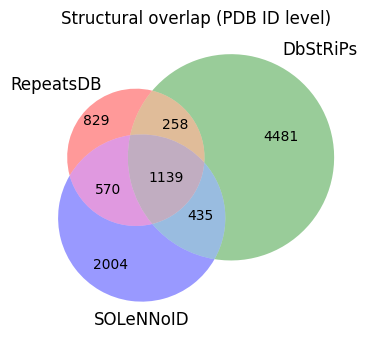

In [45]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
set1 = set(rdb_pdb_ids)
set2 = set(dbstrips_list)
set3 = set(remove_bad_alphas_full['structure_id'].unique().tolist())
venn3([set1, set2, set3], ('RepeatsDB', 'DbStRiPs', 'SOLeNNoID'))
plt.title('Structural overlap (PDB ID level)')
#plt.savefig('/Users/georginikov/Documents/Paper/db_struct_overlap_nocombos_pdbids.png',dpi=300)
plt.show()

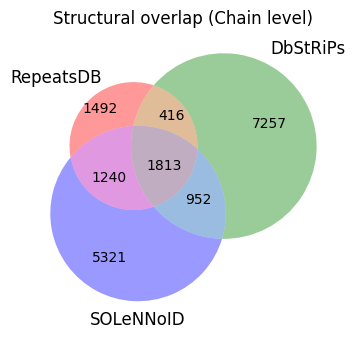

In [48]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
set1 = set(rdb_chains)
set2 = set(dbstrips_chains)
set3 = set(remove_bad_alphas_full['whole_id'].unique().tolist())
venn3([set1, set2, set3], ('RepeatsDB', 'DbStRiPs', 'SOLeNNoID'))
plt.title('Structural overlap (Chain level)')
#plt.savefig('/Users/georginikov/Documents/Paper/db_struct_overlap_nocombos_chains.png',dpi=300)
plt.show()